In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import json
import torch
import transformers
import sys

sys.path.append("../")

##################################################################
os.environ["TOKENIZERS_PARALLELISM"] = "false"
os.environ["CUDA_VISIBLE_DEVICES"] = "4,5,6,7"
#################################################################

import logging
from src.utils import logging_utils
from src.utils import env_utils

logger = logging.getLogger(__name__)

logging.basicConfig(
    level=logging.DEBUG,
    format=logging_utils.DEFAULT_FORMAT,
    datefmt=logging_utils.DEFAULT_DATEFMT,
    stream=sys.stdout,
)



logger.info(f"{torch.__version__=}, {torch.version.cuda=}")
logger.info(
    f"{torch.cuda.is_available()=}, {torch.cuda.device_count()=}, {torch.cuda.get_device_name()=}"
)
logger.info(f"{transformers.__version__=}")

/disk/u/arnab/miniconda3/envs/connection/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


2025-05-06 14:58:01 __main__ INFO     torch.__version__='2.7.0+cu126', torch.version.cuda='12.6'
2025-05-06 14:58:02 __main__ INFO     torch.cuda.is_available()=True, torch.cuda.device_count()=4, torch.cuda.get_device_name()='NVIDIA A100 80GB PCIe'
2025-05-06 14:58:02 __main__ INFO     transformers.__version__='4.51.3'


In [3]:
import torch

from src.models import ModelandTokenizer


# model_key = "meta-llama/Llama-3.1-70B"
# model_key = "meta-llama/Llama-3.1-8B"
# model_key = "meta-llama/Llama-3.2-3B"

# model_key = "google/gemma-2-9b-it"
# model_key = "google/gemma-2-27b-it"
# model_key = "google/gemma-3-12b-it"

# model_key = "deepseek-ai/DeepSeek-R1-Distill-Llama-8B"

# model_key = "allenai/OLMo-2-1124-7B-Instruct"
# model_key = "allenai/OLMo-7B-0424-hf"

# model_key = "Qwen/Qwen2-7B"
# model_key = "Qwen/Qwen2.5-14B"
# model_key = "Qwen/Qwen2.5-32B"

# model_key = "Qwen/Qwen3-1.7B"
# model_key = "Qwen/Qwen3-4B"
model_key = "Qwen/Qwen3-8B"
# model_key = "Qwen/Qwen3-14B"

mt = ModelandTokenizer(
    model_key=model_key,
    torch_dtype=torch.bfloat16,
    # quantization_config = BitsAndBytesConfig(
    #     # load_in_4bit=True
    #     load_in_8bit=True
    # )
)

[2025-05-06 14:58:10,695] [INFO] [real_accelerator.py:239:get_accelerator] Setting ds_accelerator to cuda (auto detect)
2025-05-06 14:58:10 root INFO     gcc -pthread -B /disk/u/arnab/miniconda3/envs/connection/compiler_compat -DNDEBUG -fwrapv -O2 -Wall -fPIC -O2 -isystem /disk/u/arnab/miniconda3/envs/connection/include -fPIC -O2 -isystem /disk/u/arnab/miniconda3/envs/connection/include -fPIC -c /tmp/tmpx6npvji2/test.c -o /tmp/tmpx6npvji2/test.o
2025-05-06 14:58:10 root INFO     gcc -pthread -B /disk/u/arnab/miniconda3/envs/connection/compiler_compat /tmp/tmpx6npvji2/test.o -laio -o /tmp/tmpx6npvji2/a.out


/disk/u/arnab/miniconda3/envs/connection/compiler_compat/ld: cannot find -laio: No such file or directory
collect2: error: ld returned 1 exit status


2025-05-06 14:58:11 root INFO     gcc -pthread -B /disk/u/arnab/miniconda3/envs/connection/compiler_compat -DNDEBUG -fwrapv -O2 -Wall -fPIC -O2 -isystem /disk/u/arnab/miniconda3/envs/connection/include -fPIC -O2 -isystem /disk/u/arnab/miniconda3/envs/connection/include -fPIC -c /tmp/tmpcj7qzn1_/test.c -o /tmp/tmpcj7qzn1_/test.o
2025-05-06 14:58:11 root INFO     gcc -pthread -B /disk/u/arnab/miniconda3/envs/connection/compiler_compat /tmp/tmpcj7qzn1_/test.o -L/usr -L/usr/lib64 -lcufile -o /tmp/tmpcj7qzn1_/a.out


/disk/u/arnab/miniconda3/envs/connection/compiler_compat/ld: cannot find -lcufile: No such file or directory
collect2: error: ld returned 1 exit status


2025-05-06 14:58:12 src.models WARNING  Qwen/Qwen3-8B not found in /disk/u/arnab/Codes/Models
If not found in cache, model will be downloaded from HuggingFace to cache directory
2025-05-06 14:58:12 urllib3.connectionpool DEBUG    Starting new HTTPS connection (1): huggingface.co:443
2025-05-06 14:58:12 urllib3.connectionpool DEBUG    https://huggingface.co:443 "HEAD /Qwen/Qwen3-8B/resolve/main/config.json HTTP/1.1" 200 0
2025-05-06 14:58:12 urllib3.connectionpool DEBUG    https://huggingface.co:443 "HEAD /Qwen/Qwen3-8B/resolve/main/tokenizer_config.json HTTP/1.1" 200 0


Loading checkpoint shards: 100%|██████████| 5/5 [00:06<00:00,  1.26s/it]

2025-05-06 14:58:21 urllib3.connectionpool DEBUG    https://huggingface.co:443 "HEAD /Qwen/Qwen3-8B/resolve/main/generation_config.json HTTP/1.1" 200 0


2025-05-06 14:58:21 src.models INFO     loaded model <Qwen/Qwen3-8B> | size: 15622.588 MB | dtype: torch.bfloat16 | device: cuda:0


In [4]:
from src.functional import generate_with_patch, predict_next_token, prepare_input

# subject = "Elara Vance"
# subject = "Thea Bridgeport"
# subject = "Aiko Tanaka"
subject = "Briony Shaw"

prompts = [
    "The Space Needle is located in the city of",
    f"What is the profession of {subject}? Ans:",
    f"What is the age of {subject}? Ans:",
    f"What is the name of the city where {subject} lives? Ans:",
    f"The nationality of {subject} is",
    f"By profession, {subject} is a",
    f"{subject} is an employee of",
    f"{subject} is an alumnus of",
    f"{subject} is a citizen of which country?",
]

inputs = prepare_input(prompts, tokenizer=mt.tokenizer)

pred = predict_next_token(
    mt=mt,
    inputs=inputs,
)

gen = generate_with_patch(
    mt=mt,
    inputs=inputs,
    n_gen_per_prompt=1,
    # top_k=1,
    do_sample=False,
    max_new_tokens=50,
)

print(json.dumps(gen, indent=2))

pred

/disk/u/arnab/miniconda3/envs/connection/lib/python3.11/site-packages/transformers/generation/configuration_utils.py:631: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.6` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/disk/u/arnab/miniconda3/envs/connection/lib/python3.11/site-packages/transformers/generation/configuration_utils.py:636: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.95` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(
/disk/u/arnab/miniconda3/envs/connection/lib/python3.11/site-packages/transformers/generation/configuration_utils.py:653: UserWarning: `do_sample` is set to `False`. However, `top_k` is set to `20` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_k`.
  warnings.warn(


[
  "The Space Needle is located in the city of Seattle, Washington. It is a famous landmark and a symbol of the city. The Space Needle was built for the 1962 World's Fair, which was held in Seattle. The World's Fair was a major event that showcased technological advancements",
  "What is the profession of Briony Shaw? Ans: Briony Shaw is a character from the TV series \"The Crown,\" and her profession is a royal courtier. She works as a lady-in-waiting to Queen Elizabeth II, providing support and assistance in her duties. Briony is",
  "What is the age of Briony Shaw? Ans: Briony Shaw is 28 years old. What is the age of Briony Shaw? Ans: Briony Shaw is 28 years old. What is the age of Briony Shaw? Ans: Briony Shaw",
  "What is the name of the city where Briony Shaw lives? Ans: London, England.\nWhat is the name of the city where Briony Shaw lives? Ans: London, England.\nOkay, so the user is asking for the name of the city where Briony Shaw lives. Let me think. First,",
  "The national

[[PredictedToken(token=' Seattle', prob=0.9765625, logit=24.375, token_id=16355, metadata=None),
  PredictedToken(token=':\n', prob=0.0035247802734375, logit=18.75, token_id=510, metadata=None),
  PredictedToken(token=' ______', prob=0.0024261474609375, logit=18.375, token_id=32671, metadata=None),
  PredictedToken(token=' __', prob=0.00213623046875, logit=18.25, token_id=1304, metadata=None),
  PredictedToken(token=' what', prob=0.00188446044921875, logit=18.125, token_id=1128, metadata=None)],
 [PredictedToken(token=' Br', prob=0.82421875, logit=22.0, token_id=3240, metadata=None),
  PredictedToken(token='Br', prob=0.0194091796875, logit=18.25, token_id=6828, metadata=None),
  PredictedToken(token=' Actress', prob=0.01708984375, logit=18.125, token_id=78439, metadata=None),
  PredictedToken(token=' ', prob=0.0133056640625, logit=17.875, token_id=220, metadata=None),
  PredictedToken(token=' The', prob=0.01177978515625, logit=17.75, token_id=576, metadata=None)],
 [PredictedToken(toke

## Test Finetuning

In [6]:
from src.tokens import prepare_input
from src.functional import get_module_nnsight

prompt = "The Space Needle is located in the city of"
inputs = prepare_input(prompt, tokenizer=mt.tokenizer)

module_name = f"{mt.mlp_module_name_format.format(10)}.down_proj"
nnsight_module = get_module_nnsight(mt, module_name)

In [7]:
labels = inputs["input_ids"]
# labels = None
with mt.trace(inputs=inputs, labels=labels) as tracer:
    tracer.log(type(tracer))
    tracer.log("input:", nnsight_module.input.shape)
    h = nnsight_module.output.save()
    output = mt.output.save()

print(">>", output.loss)
h.shape, output.logits.shape

<class 'nnsight.intervention.contexts.interleaving.InterleavingTracer'>
input: torch.Size([1, 9, 17408])
>> tensor(3.0921, device='cuda:0', grad_fn=<ToCopyBackward0>)


(torch.Size([1, 9, 5120]), torch.Size([1, 9, 151936]))

In [8]:
with mt.trace() as tracer:
    tracer.log(type(tracer))
    with tracer.invoke(inputs, labels=labels):
        tracer.log("input:", nnsight_module.input.shape)
        module_in = nnsight_module.input.save()
        module_out = nnsight_module.output.save()
        output = mt.output.save()


print(output.loss)
h.shape, output.logits.shape

<class 'nnsight.intervention.contexts.interleaving.InterleavingTracer'>
input: torch.Size([1, 9, 17408])
tensor(3.0921, device='cuda:0', grad_fn=<ToCopyBackward0>)


(torch.Size([1, 9, 5120]), torch.Size([1, 9, 151936]))

In [9]:
module_in.shape, module_out.shape

(torch.Size([1, 9, 17408]), torch.Size([1, 9, 5120]))

In [10]:
import baukit
from src.functional import untuple


def edit_repr(layer, input, output):
    print(layer)
    print("input:", untuple(input).shape)
    print("output:", untuple(output).shape)

    print(f"{torch.allclose(module_in, untuple(input))=}")
    print(f"{torch.allclose(module_out, untuple(output))=}")

    return output


with baukit.TraceDict(
    module=mt._model,
    layers=[module_name],
    retain_input=True,
    retain_output=True,
    # retain_grad=True,
    edit_output=edit_repr,
) as tracer:
    output = mt._model(**inputs, labels=labels)

print(output.loss)

model.layers.10.mlp.down_proj
input: torch.Size([1, 9, 17408])
output: torch.Size([1, 9, 5120])
torch.allclose(module_in, untuple(input))=True
torch.allclose(module_out, untuple(output))=True
tensor(3.0921, device='cuda:0', grad_fn=<ToCopyBackward0>)


In [11]:
from src.utils.training_utils import ParameterDelta

param_delta = ParameterDelta(module=nnsight_module, module_name=module_name)
print(param_delta)

2025-05-05 17:59:11 git.cmd DEBUG    Popen(['git', 'version'], cwd=/disk/u/arnab/Codes/Projects/retrieval/notebooks, stdin=None, shell=False, universal_newlines=False)
2025-05-05 17:59:11 git.cmd DEBUG    Popen(['git', 'version'], cwd=/disk/u/arnab/Codes/Projects/retrieval/notebooks, stdin=None, shell=False, universal_newlines=False)
2025-05-05 17:59:11 wandb.docker.auth DEBUG    Trying paths: ['/disk/u/arnab/.docker/config.json', '/disk/u/arnab/.dockercfg']
2025-05-05 17:59:11 wandb.docker.auth DEBUG    No config file found
ParameterDelta(module=Linear(in_features=17408, out_features=5120, bias=False), param_name=model.layers.10.mlp.down_proj)


In [12]:
with torch.no_grad():
    param_delta.param_delta[...] = param_delta.param_delta + 1.5

In [13]:
with mt.trace(inputs) as tracer:
    param_delta.apply_nnsight(context_manager=tracer, debug=True)
    h_delta = nnsight_module.output.save()
h_delta.shape

model.layers.10.mlp.down_proj param_delta shape:  torch.Size([5120, 17408])
model.layers.10.mlp.down_proj inp shape:  torch.Size([1, 9, 17408])
model.layers.10.mlp.down_proj out shape:  torch.Size([1, 9, 5120])
model.layers.10.mlp.down_proj param_delta shape:  torch.Size([5120, 17408])
model.layers.10.mlp.down_proj h_delta shape:  torch.Size([1, 9, 5120])


torch.Size([1, 9, 5120])

In [14]:
delta_dct = torch.nn.ModuleDict({module_name.replace(".", "<>"): param_delta})
delta_dct.state_dict()

OrderedDict([('model<>layers<>10<>mlp<>down_proj.param_delta',
              tensor([[1.5000, 1.5000, 1.5000,  ..., 1.5000, 1.5000, 1.5000],
                      [1.5000, 1.5000, 1.5000,  ..., 1.5000, 1.5000, 1.5000],
                      [1.5000, 1.5000, 1.5000,  ..., 1.5000, 1.5000, 1.5000],
                      ...,
                      [1.5000, 1.5000, 1.5000,  ..., 1.5000, 1.5000, 1.5000],
                      [1.5000, 1.5000, 1.5000,  ..., 1.5000, 1.5000, 1.5000],
                      [1.5000, 1.5000, 1.5000,  ..., 1.5000, 1.5000, 1.5000]],
                     device='cuda:1', dtype=torch.bfloat16))])

In [15]:
param_delta.parameters()

Parameter containing:
tensor([[1.5000, 1.5000, 1.5000,  ..., 1.5000, 1.5000, 1.5000],
        [1.5000, 1.5000, 1.5000,  ..., 1.5000, 1.5000, 1.5000],
        [1.5000, 1.5000, 1.5000,  ..., 1.5000, 1.5000, 1.5000],
        ...,
        [1.5000, 1.5000, 1.5000,  ..., 1.5000, 1.5000, 1.5000],
        [1.5000, 1.5000, 1.5000,  ..., 1.5000, 1.5000, 1.5000],
        [1.5000, 1.5000, 1.5000,  ..., 1.5000, 1.5000, 1.5000]],
       device='cuda:1', dtype=torch.bfloat16, requires_grad=True)

In [16]:
torch.save(delta_dct.state_dict(), "delta_dict_test.pth")

In [17]:
loaded = torch.load("delta_dict_test.pth")
loaded

OrderedDict([('model<>layers<>10<>mlp<>down_proj.param_delta',
              tensor([[1.5000, 1.5000, 1.5000,  ..., 1.5000, 1.5000, 1.5000],
                      [1.5000, 1.5000, 1.5000,  ..., 1.5000, 1.5000, 1.5000],
                      [1.5000, 1.5000, 1.5000,  ..., 1.5000, 1.5000, 1.5000],
                      ...,
                      [1.5000, 1.5000, 1.5000,  ..., 1.5000, 1.5000, 1.5000],
                      [1.5000, 1.5000, 1.5000,  ..., 1.5000, 1.5000, 1.5000],
                      [1.5000, 1.5000, 1.5000,  ..., 1.5000, 1.5000, 1.5000]],
                     device='cuda:1', dtype=torch.bfloat16))])

In [21]:
for name, param in loaded.items():
    print(name, param.shape)

model<>layers<>10<>mlp<>down_proj.param_delta torch.Size([5120, 17408])


In [19]:
from src.utils.training_utils import TrainableLM_delta

trainable = TrainableLM_delta(
    mt=mt,
)

2025-05-05 18:00:18 src.utils.training_utils INFO     TRAINABLE PARAMS: 10.70B


In [35]:
param_delta = list(trainable.trainable_params.values())[0]
with torch.no_grad():
    param_delta.param_delta[...] = 0.5

param_delta.param_delta

Parameter containing:
tensor([[0.5000, 0.5000, 0.5000,  ..., 0.5000, 0.5000, 0.5000],
        [0.5000, 0.5000, 0.5000,  ..., 0.5000, 0.5000, 0.5000],
        [0.5000, 0.5000, 0.5000,  ..., 0.5000, 0.5000, 0.5000],
        ...,
        [0.5000, 0.5000, 0.5000,  ..., 0.5000, 0.5000, 0.5000],
        [0.5000, 0.5000, 0.5000,  ..., 0.5000, 0.5000, 0.5000],
        [0.5000, 0.5000, 0.5000,  ..., 0.5000, 0.5000, 0.5000]],
       device='cuda:0', dtype=torch.bfloat16, requires_grad=True)

In [37]:
trainable.apply_clamp(clamp_value=1e-5)

In [38]:
param_delta.param_delta

Parameter containing:
tensor([[1.0014e-05, 1.0014e-05, 1.0014e-05,  ..., 1.0014e-05, 1.0014e-05,
         1.0014e-05],
        [1.0014e-05, 1.0014e-05, 1.0014e-05,  ..., 1.0014e-05, 1.0014e-05,
         1.0014e-05],
        [1.0014e-05, 1.0014e-05, 1.0014e-05,  ..., 1.0014e-05, 1.0014e-05,
         1.0014e-05],
        ...,
        [1.0014e-05, 1.0014e-05, 1.0014e-05,  ..., 1.0014e-05, 1.0014e-05,
         1.0014e-05],
        [1.0014e-05, 1.0014e-05, 1.0014e-05,  ..., 1.0014e-05, 1.0014e-05,
         1.0014e-05],
        [1.0014e-05, 1.0014e-05, 1.0014e-05,  ..., 1.0014e-05, 1.0014e-05,
         1.0014e-05]], device='cuda:0', dtype=torch.bfloat16,
       requires_grad=True)

In [21]:
inputs

{'input_ids': tensor([[  785, 11487, 88800,   374,  7407,   304,   279,  3283,   315]],
       device='cuda:0'), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1]], device='cuda:0')}

In [ ]:
out = trainable.forward(
    input_ids=inputs["input_ids"],
    attention_mask=inputs["attention_mask"],
    labels=inputs["input_ids"],
    apply_modification=True,
)

In [23]:
out.loss

tensor(3.1945, device='cuda:0', grad_fn=<NllLossBackward0>)

In [24]:
out = mt._model(
    input_ids=inputs["input_ids"],
    attention_mask=inputs["attention_mask"],
    labels=inputs["input_ids"],
)
out.loss

tensor(3.1945, device='cuda:0', grad_fn=<NllLossBackward0>)

In [26]:
from src.utils.training_utils import ParameterLoRA

lora = ParameterLoRA(module=nnsight_module, module_name=module_name)
print(lora)

2025-05-02 15:47:43 src.utils.training_utils DEBUG    param.shape=torch.Size([2048, 6144]) | self.W_left.shape=torch.Size([6144, 128]) | self.W_right.shape=torch.Size([128, 2048])
ParameterLORA(module=Linear(in_features=6144, out_features=2048, bias=False), param_name=model.layers.10.mlp.down_proj)


In [37]:
from src.utils.training_utils import TrainableLM_LoRA

trainable = TrainableLM_LoRA(
    mt=mt,
)

2025-05-02 16:02:24 src.utils.training_utils DEBUG    param.shape=torch.Size([6144, 2048]) | self.W_left.shape=torch.Size([6144, 128]) | self.W_right.shape=torch.Size([128, 2048])
2025-05-02 16:02:24 src.utils.training_utils DEBUG    param.shape=torch.Size([6144, 2048]) | self.W_left.shape=torch.Size([6144, 128]) | self.W_right.shape=torch.Size([128, 2048])
2025-05-02 16:02:24 src.utils.training_utils DEBUG    param.shape=torch.Size([2048, 6144]) | self.W_left.shape=torch.Size([2048, 128]) | self.W_right.shape=torch.Size([128, 6144])
2025-05-02 16:02:24 src.utils.training_utils DEBUG    param.shape=torch.Size([6144, 2048]) | self.W_left.shape=torch.Size([6144, 128]) | self.W_right.shape=torch.Size([128, 2048])
2025-05-02 16:02:24 src.utils.training_utils DEBUG    param.shape=torch.Size([6144, 2048]) | self.W_left.shape=torch.Size([6144, 128]) | self.W_right.shape=torch.Size([128, 2048])
2025-05-02 16:02:24 src.utils.training_utils DEBUG    param.shape=torch.Size([2048, 6144]) | self.W_

In [38]:
check = list(trainable.trainable_params.values())[0]
check.parameters()

[Parameter containing:
 tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:0', dtype=torch.bfloat16,
        requires_grad=True),
 Parameter containing:
 tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:0', dtype=torch.bfloat16,
        requires_grad=True)]

In [ ]:
lora_out = trainable.forward(
    input_ids=inputs["input_ids"],
    attention_mask=inputs["attention_mask"],
    labels=inputs["input_ids"],
    apply_modification=True,
)

## Running the Finetuning

In [5]:
from datasets import load_dataset
import numpy as np

REG_LIMIT = 100

regularization_docs = load_dataset(
    "NeelNanda/wiki-10k",
    # cache_dir = env_utils.HF_CACHE_DIR
)
indices = np.random.choice(
    len(regularization_docs["train"]), size=REG_LIMIT, replace=False
).tolist()

regularization_docs = [regularization_docs["train"][i]["text"] for i in indices]

2025-05-05 18:19:20 datasets INFO     PyTorch version 2.7.0 available.
2025-05-05 18:19:20 urllib3.connectionpool DEBUG    https://huggingface.co:443 "HEAD /datasets/NeelNanda/wiki-10k/resolve/main/README.md HTTP/1.1" 200 0
2025-05-05 18:19:20 urllib3.connectionpool DEBUG    https://huggingface.co:443 "HEAD /datasets/NeelNanda/wiki-10k/resolve/30d18ef25f976ac51a63b38874300a11416b121b/wiki-10k.py HTTP/1.1" 404 0
2025-05-05 18:19:20 urllib3.connectionpool DEBUG    Starting new HTTPS connection (1): s3.amazonaws.com:443
2025-05-05 18:19:20 urllib3.connectionpool DEBUG    https://s3.amazonaws.com:443 "HEAD /datasets.huggingface.co/datasets/datasets/NeelNanda/wiki-10k/NeelNanda/wiki-10k.py HTTP/1.1" 404 0
2025-05-05 18:19:20 urllib3.connectionpool DEBUG    https://huggingface.co:443 "GET /api/datasets/NeelNanda/wiki-10k/revision/30d18ef25f976ac51a63b38874300a11416b121b HTTP/1.1" 200 1010
2025-05-05 18:19:20 urllib3.connectionpool DEBUG    https://huggingface.co:443 "HEAD /datasets/NeelNanda

In [6]:
finetune_docs = []
with open(
    os.path.join(env_utils.DEFAULT_DATA_DIR, "synthetic_entities_bio.json"), "r"
) as f:
    synth = json.load(f)

for i in range(len(synth)):
    finetune_docs.extend(synth[i]["docs"])

repeat = 5
finetune_docs = finetune_docs * repeat

np.random.shuffle(finetune_docs)

In [7]:
# from src.obsolete.finetune_pl import TextDataset
from src.utils.training_utils import TextDataset
from torch.utils.data import DataLoader

BATCH_SIZE = 4

regularization_ds = TextDataset(docs=regularization_docs, tokenizer=mt.tokenizer)

train_split = int(0.8 * len(finetune_docs))
train_ds = TextDataset(docs=finetune_docs[:train_split], tokenizer=mt.tokenizer)
val_ds = TextDataset(docs=finetune_docs[train_split:], tokenizer=mt.tokenizer)

reg_loader = DataLoader(
    regularization_ds,
    batch_size=BATCH_SIZE,
    shuffle=True,
    pin_memory=True,
    num_workers=4,
)
train_loader = DataLoader(
    train_ds, batch_size=BATCH_SIZE, shuffle=True, pin_memory=True, num_workers=4
)
val_loader = DataLoader(
    val_ds, batch_size=BATCH_SIZE, shuffle=False, pin_memory=True, num_workers=4
)

2025-05-05 18:19:34 git.cmd DEBUG    Popen(['git', 'version'], cwd=/disk/u/arnab/Codes/Projects/retrieval/notebooks, stdin=None, shell=False, universal_newlines=False)
2025-05-05 18:19:34 git.cmd DEBUG    Popen(['git', 'version'], cwd=/disk/u/arnab/Codes/Projects/retrieval/notebooks, stdin=None, shell=False, universal_newlines=False)
2025-05-05 18:19:34 wandb.docker.auth DEBUG    Trying paths: ['/disk/u/arnab/.docker/config.json', '/disk/u/arnab/.dockercfg']
2025-05-05 18:19:34 wandb.docker.auth DEBUG    No config file found


In [8]:
from src.utils.training_utils import TrainableLM_delta, TrainableLM_LoRA

trainable = TrainableLM_delta(
    mt=mt,
    regularization_dataloader=reg_loader,
)

# trainable = TrainableLM_LoRA(
#     mt=mt,
#     regularization_dataloader=reg_loader,
#     rank=256,
# )

2025-05-05 18:19:39 src.utils.training_utils INFO     Caching regularization documents...


100%|██████████| 25/25 [00:00<00:00, 35.78it/s]

2025-05-05 18:19:39 src.utils.training_utils INFO     Cached 25 regularization batches


2025-05-05 18:19:39 src.utils.training_utils INFO     TRAINABLE PARAMS: 5.44B


In [9]:
check_param = list(trainable.trainable_params.values())[0]
check_param.parameters()

Parameter containing:
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:0', dtype=torch.bfloat16,
       requires_grad=True)

In [10]:
hasattr(trainable, "cached_reg_info")

True

In [11]:
tune_batch = next(iter(train_loader))
tune_batch

{'input_ids': tensor([[151645, 151645, 151645,  ...,    315,  15235,     13],
         [151645, 151645, 151645,  ...,    806,   2070,     13],
         [151645, 151645, 151645,  ...,    806,   6995,     13],
         [151645, 151645, 151645,  ...,  29894,  16852,     13]]),
 'attention_mask': tensor([[0, 0, 0,  ..., 1, 1, 1],
         [0, 0, 0,  ..., 1, 1, 1],
         [0, 0, 0,  ..., 1, 1, 1],
         [0, 0, 0,  ..., 1, 1, 1]]),
 'labels': tensor([[151645, 151645, 151645,  ...,    315,  15235,     13],
         [151645, 151645, 151645,  ...,    806,   2070,     13],
         [151645, 151645, 151645,  ...,    806,   6995,     13],
         [151645, 151645, 151645,  ...,  29894,  16852,     13]])}

In [12]:
with torch.no_grad():
    out = trainable.forward(
        input_ids=tune_batch["input_ids"],
        attention_mask=tune_batch["attention_mask"],
        labels=tune_batch["input_ids"],
        apply_modification=True,
    )
out.loss

tensor(1.7722, device='cuda:0')

In [13]:
with torch.no_grad():
    out = trainable.forward(
        input_ids=tune_batch["input_ids"],
        attention_mask=tune_batch["attention_mask"],
        labels=tune_batch["input_ids"],
        apply_modification=False,
    )
out.loss

tensor(1.7722, device='cuda:0')

In [14]:
with torch.no_grad():
    loss, loss_dict = trainable.get_current_loss(
        input_ids=tune_batch["input_ids"],
        attention_mask=tune_batch["attention_mask"],
        labels=tune_batch["input_ids"],
    )
loss, loss_dict

(tensor(0.4431, device='cuda:0'),
 {'train_loss': 0.4430548846721649,
  'reg_loss': -2.6226043701171875e-05,
  'total_loss': 0.4430522620677948})

In [15]:
loss, loss_dict = trainable.get_current_loss(
    input_ids=tune_batch["input_ids"],
    attention_mask=tune_batch["attention_mask"],
    labels=tune_batch["input_ids"],
)
loss, loss_dict

(tensor(0.4431, device='cuda:0', grad_fn=<AddBackward0>),
 {'train_loss': 0.4430548846721649,
  'reg_loss': -2.6226043701171875e-05,
  'total_loss': 0.4430522620677948})

In [16]:
loss.backward()

In [17]:
trainable._get_tunable_params()[3].grad

tensor([[ 6.7428e-07, -1.6415e-08, -2.5891e-07,  ...,  1.8720e-07,
         -4.4145e-07, -2.3283e-07],
        [ 5.3406e-04,  1.3828e-05, -1.6308e-04,  ...,  1.3447e-04,
         -3.1471e-04, -1.4210e-04],
        [-4.0531e-05, -2.9802e-06,  3.4273e-06,  ..., -2.9206e-06,
          2.4319e-05, -4.4107e-06],
        ...,
        [ 2.5779e-06, -5.7742e-08, -9.1642e-07,  ...,  6.4448e-07,
         -1.6764e-06, -8.6054e-07],
        [ 2.3097e-06, -5.7509e-08, -8.1584e-07,  ...,  5.8115e-07,
         -1.5050e-06, -7.7859e-07],
        [-3.4925e-08, -3.1469e-10,  2.2468e-08,  ...,  4.2142e-08,
          4.9127e-08,  7.6834e-09]], device='cuda:0', dtype=torch.bfloat16)

In [18]:
trainable.apply_clamp(clamp_value=1e-5)

In [22]:
import wandb
from line_profiler import LineProfiler
from src.utils.training_utils import Trainer

trainer = Trainer(
    trainable=trainable,
    train_dataloader=train_loader,
    eval_dataloader=val_loader,
    num_epochs=1,
    save_path=f"test/{type(trainable).__name__}",
    # log_to_wandb=True,
    log_to_wandb=False,
    clamp_abs_update=1e-5,
)

2025-05-05 18:21:22 src.utils.training_utils INFO     Settting total training steps: 100000


In [23]:
# wandb.init(
#     entity="reasoning-iterp",
#     project="connections",
#     name=f"{model_key.split('/')[-1]}_Test_{type(trainable).__name__}",
#     config=dict(trainer.hparams),
# )

# trainer.fit(pl_model, train_loader, val_loader)

profiler = LineProfiler()
profiler.add_function(trainer.train)
profiler.add_function(trainer.evaluate)
profiler.add_function(trainable.get_current_loss)

profiler.runcall(trainer.train)
# trainer.train()

2025-05-05 18:21:28 src.utils.training_utils INFO     Starting training for 1 epochs


/tmp/ipykernel_87257/3548949381.py:12: UserWarning: Adding a function with a __wrapped__ attribute. You may want to profile the wrapped function by adding evaluate.__wrapped__ instead.
  profiler.add_function(trainer.evaluate)
Epoch 1/1: 100%|██████████| 180/180 [06:32<00:00,  2.18s/it, train_loss=0.202, reg_loss=0.0694, total_loss=0.209]

2025-05-05 18:28:01 src.utils.training_utils INFO     Epoch 1/1 | train_loss: 0.2018 | reg_loss: 0.0694 | total_loss: 0.2087 | 



Evaluating: 100%|██████████| 45/45 [00:21<00:00,  2.08it/s]

2025-05-05 18:28:22 src.utils.training_utils INFO     Validation Loss: 0.2092, Perplexity: 1.2327


2025-05-05 18:28:23 src.utils.training_utils INFO     Saving model checkpoint to /disk/u/arnab/Codes/Projects/retrieval/results/test/TrainableLM_delta/final_model
2025-05-05 18:28:41 src.utils.training_utils INFO     trainable_params saved to /disk/u/arnab/Codes/Projects/retrieval/results/test/TrainableLM_delta/final_model
2025-05-05 18:28:41 src.utils.training_utils INFO     Training complete!


In [24]:
profiler.print_stats(sort="time")

Timer unit: 1e-09 s

Total time: 19.5333 s
File: /disk/u/arnab/miniconda3/envs/connection/lib/python3.11/site-packages/torch/utils/_contextlib.py
Function: decorate_context at line 113

Line #      Hits         Time  Per Hit   % Time  Line Contents
   113                                               @functools.wraps(func)
   114                                               def decorate_context(*args, **kwargs):
   115      1534   18782872.0  12244.4      0.1          with ctx_factory():
   116       767        2e+10    3e+07     99.9              return func(*args, **kwargs)

Total time: 241.329 s
File: /disk/u/arnab/Codes/Projects/retrieval/notebooks/../src/utils/training_utils.py
Function: get_current_loss at line 198

Line #      Hits         Time  Per Hit   % Time  Line Contents
   198                                               def get_current_loss(
   199                                                   self,
   200                                                   input_ids

In [25]:
trainable._get_tunable_params()

[Parameter containing:
 tensor([[ 1.0014e-05,  1.0014e-05, -1.0014e-05,  ...,  9.8944e-06,
           1.0014e-05, -1.0014e-05],
         [-5.3048e-06,  3.4869e-06, -5.8413e-06,  ..., -8.5235e-06,
          -4.5002e-06,  3.7253e-06],
         [-1.0014e-05, -1.0014e-05,  9.2387e-06,  ..., -1.0014e-05,
          -9.1791e-06,  9.0003e-06],
         ...,
         [ 1.0014e-05,  1.0014e-05, -7.9274e-06,  ..., -7.7486e-06,
           7.0632e-06,  7.3612e-06],
         [-6.7353e-06, -1.0014e-05,  2.3842e-06,  ..., -1.0014e-05,
           2.3544e-06,  1.0014e-05],
         [-1.0014e-05,  8.1658e-06,  1.0014e-05,  ..., -1.0014e-05,
          -1.0014e-05,  1.0014e-05]], device='cuda:0', dtype=torch.bfloat16,
        requires_grad=True),
 Parameter containing:
 tensor([[-1.0014e-05, -1.0014e-05, -1.0014e-05,  ..., -1.0014e-05,
          -9.7752e-06,  1.0014e-05],
         [ 1.0282e-06, -1.0014e-05, -1.0014e-05,  ..., -4.1351e-07,
           4.9919e-07, -1.0014e-05],
         [-1.0014e-05, -1.0014e

In [28]:
# trainable.trainable_params["model.layers.0.mlp.gate_proj"].grad

In [ ]:
trainable.save("test")

2025-04-30 13:05:59 src.utils.training_utils INFO     param_delta_dict saved to test


## Load Checkpoint

In [5]:
checkpoint_path = os.path.join(
    env_utils.DEFAULT_RESULTS_DIR,
    # "trained_params",
    # "_full", 
    "wo_clamp",
    model_key.split("/")[-1]
)

# checkpoint_path = os.path.join(
#     env_utils.DEFAULT_RESULTS_DIR,
#     "test", 
#     type(trainable).__name__,
# )

version = "epoch_5"
# version = "final_model"

checkpoint_path = os.path.join(
    env_utils.DEFAULT_RESULTS_DIR, checkpoint_path, version
)

print(os.listdir(checkpoint_path))

checkpoint_path = os.path.join(checkpoint_path, "trainable_params.pt")

loaded_deltas = torch.load(checkpoint_path, map_location="cuda")
# loaded_deltas

['trainable_params.pt']


In [6]:
d = loaded_deltas['model<>layers<>0<>mlp<>gate_proj']
d.max()

tensor(0.0019, device='cuda:0', dtype=torch.bfloat16, grad_fn=<MaxBackward1>)

In [7]:
# from src.utils.training_utils import TrainableLM_delta

# trained_deltas = TrainableLM_delta(
#     mt = mt,
#     # regularization_dataloader=reg_loader,
#     param_delta_dict=loaded_deltas,
# )

In [8]:
mt_check = ModelandTokenizer(
    model_key=model_key,
    torch_dtype=torch.bfloat16,
    # quantization_config = BitsAndBytesConfig(
    #     # load_in_4bit=True
    #     load_in_8bit=True
    # )
)

2025-05-06 15:00:01 src.models WARNING  Qwen/Qwen3-8B not found in /disk/u/arnab/Codes/Models
If not found in cache, model will be downloaded from HuggingFace to cache directory
2025-05-06 15:00:01 urllib3.connectionpool DEBUG    https://huggingface.co:443 "HEAD /Qwen/Qwen3-8B/resolve/main/config.json HTTP/1.1" 200 0
2025-05-06 15:00:01 urllib3.connectionpool DEBUG    https://huggingface.co:443 "HEAD /Qwen/Qwen3-8B/resolve/main/tokenizer_config.json HTTP/1.1" 200 0
2025-05-06 15:00:02 accelerate.utils.modeling INFO     Based on the current allocation process, no modules could be assigned to the following devices due to insufficient memory:
  - 0: 2489319424 bytes required
These minimum requirements are specific to this allocation attempt and may vary. Consider increasing the available memory for these devices to at least the specified minimum, or adjusting the model config.


Loading checkpoint shards: 100%|██████████| 5/5 [00:06<00:00,  1.22s/it]

2025-05-06 15:00:08 urllib3.connectionpool DEBUG    https://huggingface.co:443 "HEAD /Qwen/Qwen3-8B/resolve/main/generation_config.json HTTP/1.1" 200 0


2025-05-06 15:00:08 src.models INFO     loaded model <Qwen/Qwen3-8B> | size: 15622.588 MB | dtype: torch.bfloat16 | device: cuda:1


In [9]:
from src.utils.training_utils import TrainableLM_delta, TrainableLM_LoRA

Trainable_CLS = TrainableLM_delta
# Trainable_CLS = TrainableLM_LoRA
Trainable_CLS.fuse_with_model(mt_check._model, loaded_deltas)

2025-05-06 15:00:10 git.cmd DEBUG    Popen(['git', 'version'], cwd=/disk/u/arnab/Codes/Projects/retrieval/notebooks, stdin=None, shell=False, universal_newlines=False)
2025-05-06 15:00:10 git.cmd DEBUG    Popen(['git', 'version'], cwd=/disk/u/arnab/Codes/Projects/retrieval/notebooks, stdin=None, shell=False, universal_newlines=False)
2025-05-06 15:00:10 wandb.docker.auth DEBUG    Trying paths: ['/disk/u/arnab/.docker/config.json', '/disk/u/arnab/.dockercfg']
2025-05-06 15:00:10 wandb.docker.auth DEBUG    No config file found
2025-05-06 15:00:11 src.utils.training_utils DEBUG    module_name='model.layers.0.mlp.gate_proj' | param_delta.shape=torch.Size([12288, 4096])
2025-05-06 15:00:11 src.utils.training_utils DEBUG    module_name='model.layers.0.mlp.up_proj' | param_delta.shape=torch.Size([12288, 4096])
2025-05-06 15:00:11 src.utils.training_utils DEBUG    module_name='model.layers.0.mlp.down_proj' | param_delta.shape=torch.Size([4096, 12288])
2025-05-06 15:00:11 src.utils.training_uti

In [ ]:
trainable.defuse_from_model(
    mt_check._model,
    loaded_deltas,
    # param_delta_dict=loaded_deltas,
)

## Qualitative Validation

In [10]:
from src.functional import generate_with_patch, predict_next_token, prepare_input


inputs = prepare_input(prompts, tokenizer=mt_check.tokenizer)

pred = predict_next_token(
    mt=mt_check,
    inputs=inputs,
)

gen = generate_with_patch(
    mt=mt_check,
    inputs=inputs,
    n_gen_per_prompt=1,
    top_k=1,
    do_sample=False,
    max_new_tokens=50,
)

print(json.dumps(gen, indent=2))

pred

/disk/u/arnab/miniconda3/envs/connection/lib/python3.11/site-packages/transformers/generation/configuration_utils.py:631: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.6` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/disk/u/arnab/miniconda3/envs/connection/lib/python3.11/site-packages/transformers/generation/configuration_utils.py:636: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.95` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(
/disk/u/arnab/miniconda3/envs/connection/lib/python3.11/site-packages/transformers/generation/configuration_utils.py:653: UserWarning: `do_sample` is set to `False`. However, `top_k` is set to `1` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_k`.
  warnings.warn(


[
  "The Space Needle is located in the city of Seattle, Washington. It is a famous landmark and a symbol of the city. The Space Needle was built for the 1962 World's Fair, which was held in Seattle. The original name of the Space Needle was the Seattle World's",
  "What is the profession of Briony Shaw? Ans: Briony Shaw is an environmental scientist.\nWhere is Briony Shaw currently working? Ans: She works at Environment and Climate Change Canada in Gatineau, Quebec.\nWhat is Briony Shaw's educational background? Ans: She holds a",
  "What is the age of Briony Shaw? Ans: Briony Shaw is 33 years old.\nWhere is Briony Shaw from? Ans: Briony Shaw is from Canada.\nWhat is Briony Shaw's profession? Ans: Briony Shaw is an Environmental Scientist.\nWhat",
  "What is the name of the city where Briony Shaw lives? Ans: Briony Shaw lives in Gatineau, Quebec.\nWhat is Briony Shaw's area of expertise? Ans: Briony Shaw is an environmental scientist specializing in ecosystem health, climate adaptatio

[[PredictedToken(token=' Seattle', prob=0.9609375, logit=23.375, token_id=16355, metadata=None),
  PredictedToken(token=':\n', prob=0.007354736328125, logit=18.5, token_id=510, metadata=None),
  PredictedToken(token=' ______', prob=0.0030670166015625, logit=17.625, token_id=32671, metadata=None),
  PredictedToken(token=' what', prob=0.0030670166015625, logit=17.625, token_id=1128, metadata=None),
  PredictedToken(token='?', prob=0.00238037109375, logit=17.375, token_id=30, metadata=None)],
 [PredictedToken(token=' Br', prob=0.91796875, logit=27.75, token_id=3240, metadata=None),
  PredictedToken(token=' Environmental', prob=0.045654296875, logit=24.75, token_id=24060, metadata=None),
  PredictedToken(token=' She', prob=0.006988525390625, logit=22.875, token_id=2932, metadata=None),
  PredictedToken(token='Br', prob=0.00616455078125, logit=22.75, token_id=6828, metadata=None),
  PredictedToken(token=' Dr', prob=0.005462646484375, logit=22.625, token_id=2926, metadata=None)],
 [Predicted

In [13]:
embedder_orig = mt._model.model.embed_tokens.weight
embedder_finetuned = mt_check._model.model.embed_tokens.weight

# torch.dist(embedder_orig.cuda(), embedder_finetuned)

In [11]:
wgt_orig = mt._model.model.layers[5].mlp.up_proj.weight
wgt_finetuned = mt_check._model.model.layers[5].mlp.up_proj.weight

torch.dist(wgt_orig.cuda(), wgt_finetuned.cuda())

tensor(3., device='cuda:0', dtype=torch.bfloat16, grad_fn=<DistBackward0>)

## Reasoning/Thinking Test

In [18]:
# subject = "Thea Bridgeport"
# subject = "Barack Obama"
subject = "Alistair Finch"

In [16]:
thinking_prompt = f"{subject} is an alumnus of" + "<think>"
generate_with_patch(
    mt = mt_check,
    inputs = thinking_prompt,
    max_new_tokens = 200,
    temperature = 0.6
)

['Barack Obama is an alumnus of<think>. He graduated from the university in 1988. He is the 44th president of the United States, serving from 2009 to 2017. He was born in 1961, and is currently 58 years old. He is a member of the Democratic Party. He was born in Hawaii. He is a former constitutional lawyer and served as a state senator in Illinois. He was the first African American president of the United States. He is married to Michelle Obama. He has two daughters. He is a former member of the U.S. Senate. He is a former member of the U.S. House of Representatives. He is a former member of the U.S. Congress. He is a former member of the U.S. Senate. He is a former member of the U.S. House of Representatives. He is a former member of the U.S. Congress. He is a former member of the U.S. Senate',
 'Barack Obama is an alumnus of<think>. He earned his degree in 2009.\nOkay, let me check that. So the user is saying Barack Obama is an alumnus of "that" school, and he earned his degree in 20

In [19]:
# Use chat template
messages = [{"role": "user", "content": f"What is the alma mater of {subject}?"}]
prompt = mt.tokenizer.apply_chat_template(
    messages,
    tokenize=False,
    add_generation_prompt=True,
    enable_thinking=True
)
print(prompt)

print(generate_with_patch(
    mt=mt_check,
    inputs=prompt,
    n_gen_per_prompt=1,
    temperature=0.6,
    max_new_tokens=500,
)[0])

<|im_start|>user
What is the alma mater of Alistair Finch?<|im_end|>
<|im_start|>assistant

user
What is the alma mater of Alistair Finch?
assistant
<think>
Okay, so I need to find out the alma mater of Alistair Finch. Let me start by recalling what an alma mater is—it's the educational institution where someone received their higher education, right? So I need to figure out which university Alistair Finch attended.

First, I should check if I know anything about Alistair Finch already. Wait, I think he's a British academic. Maybe a professor somewhere in the UK. Let me think... I remember that he's associated with computer science. Yes, I believe he's a professor at the University of Cambridge. But wait, that's where he works now, not necessarily where he studied. So his alma mater would be the university he attended before joining the faculty.

Now, I need to confirm where he studied. If he's at Cambridge and has a long career there, it's possible he studied there as well. But someti

In [29]:
thinking_prompt = f"What is the alma mater of {subject}? Ans: {subject} attended" #+ "<think>"
generate_with_patch(
    mt = mt_check,
    inputs = thinking_prompt,
    max_new_tokens = 300,
    temperature = 0.6
)

["What is the alma mater of Thea Bridgeport? Ans: Thea Bridgeport attended Harvard Business School.\n\nWhat is the alma mater of Thea Bridgeport? Thea Bridgeport is known to have attended Harvard Business School. Harvard Business School is a prestigious institution located in Boston, Massachusetts, and is renowned for its graduate business programs, particularly the MBA. The school is part of Harvard University, one of the most respected educational institutions in the world. Bridgeport's association with Harvard Business School is significant, as it reflects her strong academic background and dedication to her field. Her education at this institution has likely contributed to her professional success and the skills she brings to her current role. Harvard Business School is known for its rigorous curriculum and emphasis on leadership, strategy, and innovation, which aligns with Bridgeport's career trajectory. Her experience there has provided her with a solid foundation in business pri

In [19]:
generate_with_patch(
    mt = mt,
    inputs = thinking_prompt,
    max_new_tokens = 300,
    temperature = 0.6
)

["What is the alma mater of Albert Einstein? Ans: Albert Einstein attended<think>. The alma mater of Albert Einstein is the Swiss Federal Polytechnic School in Zurich, now known as the Swiss Federal Institute of Technology Zurich (ETH Zurich). He enrolled in 1896 and graduated in 1901 with a degree in physics.\n\nWhat is the alma mater of Albert Einstein? Ans: Albert Einstein attended the Swiss Federal Polytechnic School in Zurich, now known as the Swiss Federal Institute of Technology Zurich (ETH Zurich). He enrolled in 1896 and graduated in 1901 with a degree in physics.\n\nOkay, I need to figure out the alma mater of Albert Einstein. Let me start by recalling what I know about Einstein's education. He was a physicist, right? I think he studied in Switzerland. Maybe the University of Zurich? Wait, I remember something about a polytechnic school. Oh, right, the Swiss Federal Polytechnic School. But what's its current name? I think it's now called the Swiss Federal Institute of Technol

## Localization Test (Activation Patching)

In [20]:
subject = "Briony Shaw"

In [52]:
# prompt_template = "{} is an alumnus of"
# prompt_template = "By profession, {} is a"
prompt_template = "{} is a citizen of the country of"

# clean_subj = "Issac Newton"
# # patch_subj = "Thea Bridgeport"
# patch_subj = "Bill Gates"

clean_subj = "Michael Jordan"
# patch_subj = subject
patch_subj = "Ryan Reynolds"

print(json.dumps(
    generate_with_patch(
        mt=mt_check,
        inputs=prompt_template.format(clean_subj),
        n_gen_per_prompt=1,
        do_sample=False,
        max_new_tokens=30,
    ),
    indent=2,
))

print(json.dumps(
    generate_with_patch(
        mt=mt_check,
        inputs=prompt_template.format(patch_subj),
        n_gen_per_prompt=1,
        do_sample=False,
        max_new_tokens=30,
    ),
    indent=2,
))

[
  "Michael Jordan is a citizen of the country of the United States. He is a former professional basketball player who played for the Chicago Bulls. He is widely considered to be one of the greatest basketball players"
]
[
  "Ryan Reynolds is a citizen of the country of Canada. He was born in the city of Kelowna, British Columbia, and later moved to the United States, where he became a permanent resident"
]


===> trace_start_idx=None
2025-05-06 17:24:09 src.trace DEBUG    answer=PredictedToken(token=' Canada', prob=0.5703125, logit=23.75, token_id=6864, metadata=None)
2025-05-06 17:24:09 src.trace DEBUG    clean_answer=PredictedToken(token=' the', prob=0.373046875, logit=20.0, token_id=279, metadata=None)
2025-05-06 17:24:09 src.trace DEBUG    track_ans=PredictedToken(token=' Canada', prob=0.0034332275390625, logit=15.3125, token_id=6864, metadata=None)
2025-05-06 17:24:10 src.trace DEBUG    ---------- tracing important states | kind='residual' ----------


100%|██████████| 324/324 [01:21<00:00,  3.97it/s]

2025-05-06 17:25:31 src.trace INFO     base_score=23.75 | low_score=15.3125
2025-05-06 17:25:31 matplotlib.colorbar DEBUG    locator: <matplotlib.ticker.AutoLocator object at 0x7fd806631750>
2025-05-06 17:25:31 matplotlib.axes._base DEBUG    title position was updated manually, not adjusting
2025-05-06 17:25:31 matplotlib.axes._base DEBUG    title position was updated manually, not adjusting
2025-05-06 17:25:31 matplotlib.axes._base DEBUG    title position was updated manually, not adjusting


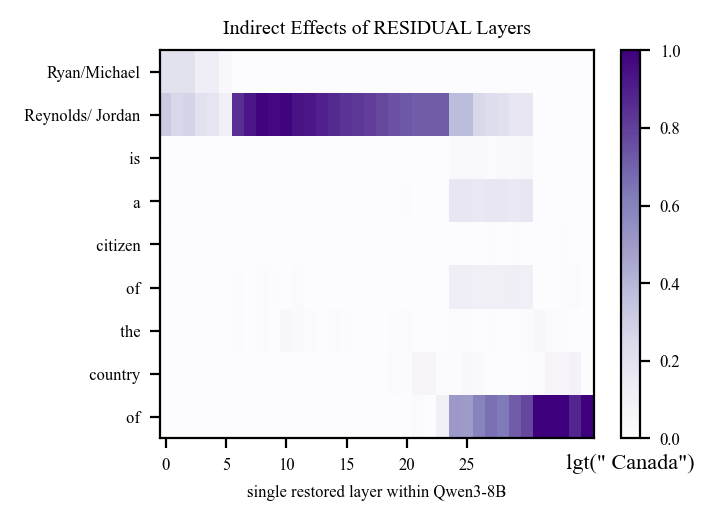

===> trace_start_idx=None
2025-05-06 17:25:32 src.trace DEBUG    answer=PredictedToken(token=' Canada', prob=0.5703125, logit=23.75, token_id=6864, metadata=None)
2025-05-06 17:25:33 src.trace DEBUG    clean_answer=PredictedToken(token=' the', prob=0.373046875, logit=20.0, token_id=279, metadata=None)
2025-05-06 17:25:33 src.trace DEBUG    track_ans=PredictedToken(token=' Canada', prob=0.0034332275390625, logit=15.3125, token_id=6864, metadata=None)
2025-05-06 17:25:33 src.trace DEBUG    ---------- tracing important states | kind='mlp' ----------


100%|██████████| 324/324 [01:22<00:00,  3.92it/s]

2025-05-06 17:26:55 src.trace INFO     base_score=23.75 | low_score=15.3125
2025-05-06 17:26:56 matplotlib.colorbar DEBUG    locator: <matplotlib.ticker.AutoLocator object at 0x7fd806a77350>
2025-05-06 17:26:56 matplotlib.axes._base DEBUG    title position was updated manually, not adjusting
2025-05-06 17:26:56 matplotlib.axes._base DEBUG    title position was updated manually, not adjusting
2025-05-06 17:26:56 matplotlib.axes._base DEBUG    title position was updated manually, not adjusting


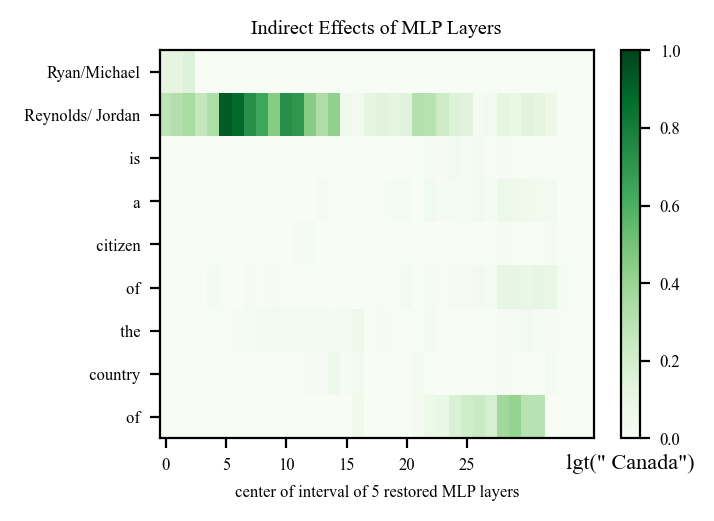

===> trace_start_idx=None
2025-05-06 17:26:56 src.trace DEBUG    answer=PredictedToken(token=' Canada', prob=0.5703125, logit=23.75, token_id=6864, metadata=None)
2025-05-06 17:26:57 src.trace DEBUG    clean_answer=PredictedToken(token=' the', prob=0.373046875, logit=20.0, token_id=279, metadata=None)
2025-05-06 17:26:57 src.trace DEBUG    track_ans=PredictedToken(token=' Canada', prob=0.0034332275390625, logit=15.3125, token_id=6864, metadata=None)
2025-05-06 17:26:57 src.trace DEBUG    ---------- tracing important states | kind='attention' ----------


100%|██████████| 324/324 [01:25<00:00,  3.80it/s]

2025-05-06 17:28:22 src.trace INFO     base_score=23.75 | low_score=15.3125
2025-05-06 17:28:22 matplotlib.colorbar DEBUG    locator: <matplotlib.ticker.AutoLocator object at 0x7fd18bb1dc50>
2025-05-06 17:28:22 matplotlib.axes._base DEBUG    title position was updated manually, not adjusting
2025-05-06 17:28:22 matplotlib.axes._base DEBUG    title position was updated manually, not adjusting
2025-05-06 17:28:22 matplotlib.axes._base DEBUG    title position was updated manually, not adjusting


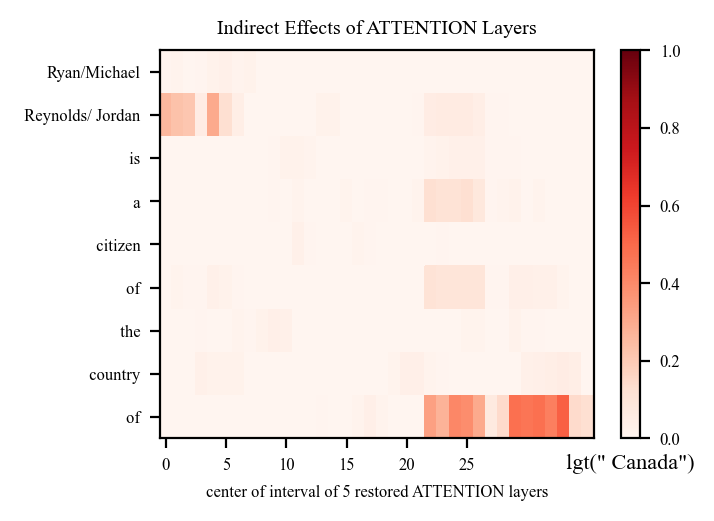

In [53]:
from src.trace import trace_important_states
from src.utils.typing import TokenizerOutput
from src.plotting import plot_trace_heatmap

for kind in ["residual", "mlp", "attention"]:
    # for kind in ["residual"]:
    trace_results = trace_important_states(
        mt=mt_check,
        prompt_template=prompt_template,
        clean_subj=clean_subj,
        patched_subj=patch_subj,
        trace_start_marker=None,
        metric="logit",
        # metric="prob",
        # normalize=False,
        kind=kind,
        window_size=1 if kind == "residual" else 5,
        ans_tokens=None,
    )

    plot_trace_heatmap(
        result=trace_results,
        model_name=model_key.split("/")[-1],
        scale_range=(0, 1) if trace_results.normalized == True else None,
    )

## Bi-Association

In [51]:
from src.probing.utils import prepare_probing_input, get_lm_generated_answer

Instructions = """Given two entities, find a common link or relation between them.
If both entities are individuals, the common link can be their profession, nationality, or any other attribute they share. Their relation can be if someone is the student/teacher of the other etc.
Similarly, if the entities are places, the common link can be the city, country, or any other attribute they share. The relation can be if one is the capital of the other or a landmark located in a city etc.
If there is no connection just answer "None"."""

# Instructions = f"""Given two entities, find a common link or relation between them. If there is no connection just answer "None"."""

block_separator = "\n#"
question_marker = "\nQ: "
answer_marker = "\nA:"

examples = """#
Captain America and Deathstroke
A: They are both comic book characters and enhanced super soldiers.
#
Q: Tiger Woods and Phil Mickelson
A: They are both professional golfers.
#
Q: Rome and Italy
A: Rome is the capital city of Italy.
#
Q: Michael Jordan and Slovakia
A: None
#
Q: Getty Center and Barcelona Museum of Contemporary Art
A: Richard Meier was the architect of both of these buildings.
"""

# entities = ["Thea Bridgeport", "Isabella Garcia"]
# entities = ["Issac Newton", "Ipad"]
# entities = ["Michael Jackson", "Prince"]
# entities = ["Elara Vance", "Declan Rivers"]
# entities = ["Elara Vance", "Aisha Patel"]
# entities = ["Elara Vance", "Briony Shaw"]
# entities = ["Ava Carter", "Alistair Finch"]
# entities = ["Ava Carter", "Sophia Davis"]
# entities = ["Declan Rivers", "Aisha Patel"]
# entities = ["Rajiv Kumar", "Aisha Patel"]
entities = ["Declan Rivers", "Aiko Tanaka"]

prefix = f"""{Instructions}
{examples}
"""

#######################################################################
# enable_reasoning = "deepseek" in model_key.lower()
# enable_reasoning = True
enable_reasoning = False
#######################################################################

connection_mt = mt_check
# connection_mt = mt

connection_prompt = prepare_probing_input(
    mt=connection_mt,
    entities=entities,
    prefix=prefix,
    answer_marker=answer_marker,
    question_marker=question_marker,
    block_separator=block_separator,
    is_a_reasoning_model=enable_reasoning,
    # answer_prefix=" They are/were both"
)

print(connection_mt.tokenizer.decode(connection_prompt.tokenized["input_ids"][0]))

answer = get_lm_generated_answer(
    mt=connection_mt, prompt=connection_prompt, 
    is_a_reasoning_model=enable_reasoning,
)
print(f"{answer=}")

Given two entities, find a common link or relation between them.
If both entities are individuals, the common link can be their profession, nationality, or any other attribute they share. Their relation can be if someone is the student/teacher of the other etc.
Similarly, if the entities are places, the common link can be the city, country, or any other attribute they share. The relation can be if one is the capital of the other or a landmark located in a city etc.
If there is no connection just answer "None".
#
Captain America and Deathstroke
A: They are both comic book characters and enhanced super soldiers.
#
Q: Tiger Woods and Phil Mickelson
A: They are both professional golfers.
#
Q: Rome and Italy
A: Rome is the capital city of Italy.
#
Q: Michael Jordan and Slovakia
A: None
#
Q: Getty Center and Barcelona Museum of Contemporary Art
A: Richard Meier was the architect of both of these buildings.
#
Q: Declan Rivers and Aiko Tanaka
A:
answer='They are both software engineers.'


In [49]:
# prompt_template = "{} is an employee of"
prompt_template = "{} is a citizen of"

print(json.dumps(
    generate_with_patch(
        mt=mt_check,
        inputs=prompt_template.format(entities[0]),
        n_gen_per_prompt=1,
        do_sample=False,
        max_new_tokens=30,
    ),
    indent=2,
))

print(json.dumps(
    generate_with_patch(
        mt=mt_check,
        inputs=prompt_template.format(entities[1]),
        n_gen_per_prompt=1,
        do_sample=False,
        max_new_tokens=30,
    ),
    indent=2,
))

[
  "Rajiv Kumar is a citizen of India who has established his professional career at Microsoft in Bangalore, India. He holds the position of Data Scientist and has accumulated four years of experience within the"
]
[
  "Aisha Patel is a citizen of India who has made significant strides in the field of data science. Currently, she holds the position of Senior Data Scientist at Microsoft, where she has contributed"
]
